In [1]:
#Assignment no. 8 - Write a Program to implement KNN for classification.


In [2]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [3]:
#Exploratory Data Analysis

#Read the training & test data
liver_df = pd.read_csv('indian_liver_patient_dataset.csv')


In [4]:
#Viewing Head of Dataset
liver_df.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [5]:
#Checking information, if missing values are found
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      583 non-null    int64  
 1   gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   alkphos  583 non-null    float64
 5   sgpt     583 non-null    float64
 6   sgot     583 non-null    float64
 7   TP       583 non-null    float64
 8   ALB      583 non-null    float64
 9   A_G      583 non-null    float64
 10  class    583 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 50.2+ KB


In [6]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe(include='all')

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,-685.16578,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,8261.85600,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,-100000.00000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.70000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.92000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.10000,2.000000


In [7]:
#Which features are available in the dataset?
liver_df.columns

Index(['age', 'gender', 'TB', 'DB', 'alkphos', 'sgpt', 'sgot', 'TP', 'ALB',
       'A_G', 'class'],
      dtype='object')

In [8]:
#Check for any null values
liver_df.isnull().sum()

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        0
class      0
dtype: int64

Percentage of patients diagnosed with liver disease:  71.35506003430532


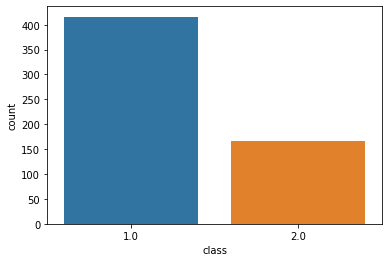

In [9]:
#Data Visualization : Percentage of patients diagnosed with Liver Disease
sns.countplot(data=liver_df, x = 'class', label='Count')

LD, NLD = liver_df['class'].value_counts()
print('Percentage of patients diagnosed with liver disease: ',LD / (LD+NLD) * 100)


Percent of patients that have liver disease:  71.35506003430532
Percent of male patients that have liver disease:  73.46938775510205
Percent of female patients that have liver disease:  64.7887323943662
Number of patients that are male:  441
Number of patients that are female:  142


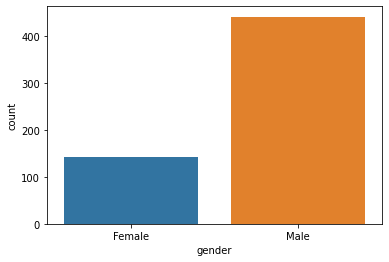

In [10]:
#Data Visualization : No. of Patients based on Gender
sns.countplot(data=liver_df, x = 'gender', label='Count')

M, F = liver_df['gender'].value_counts()
malesWithLiverDisease = liver_df[(liver_df['gender'] == 'Male') & (liver_df['class'] == 1)]['age'].count()
femalesWithLiverDisease = liver_df[(liver_df['gender'] == 'Female') & (liver_df['class'] == 1)]['age'].count()
patientsWithLiverDisease = liver_df[liver_df['class'] == 1]['age'].count()
totalPatients = liver_df['age'].count()
print('Percent of patients that have liver disease: ',patientsWithLiverDisease /totalPatients * 100)
print('Percent of male patients that have liver disease: ',malesWithLiverDisease /M * 100)
print('Percent of female patients that have liver disease: ',femalesWithLiverDisease /F * 100)

print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)


In [11]:
#Age seems to be a factor for liver disease for both male and female genders
liver_df[['class','age']].groupby(['class']).mean()

,age
class,
1.0,46.153846
2.0,41.239521


[(0.0, 500.0)]

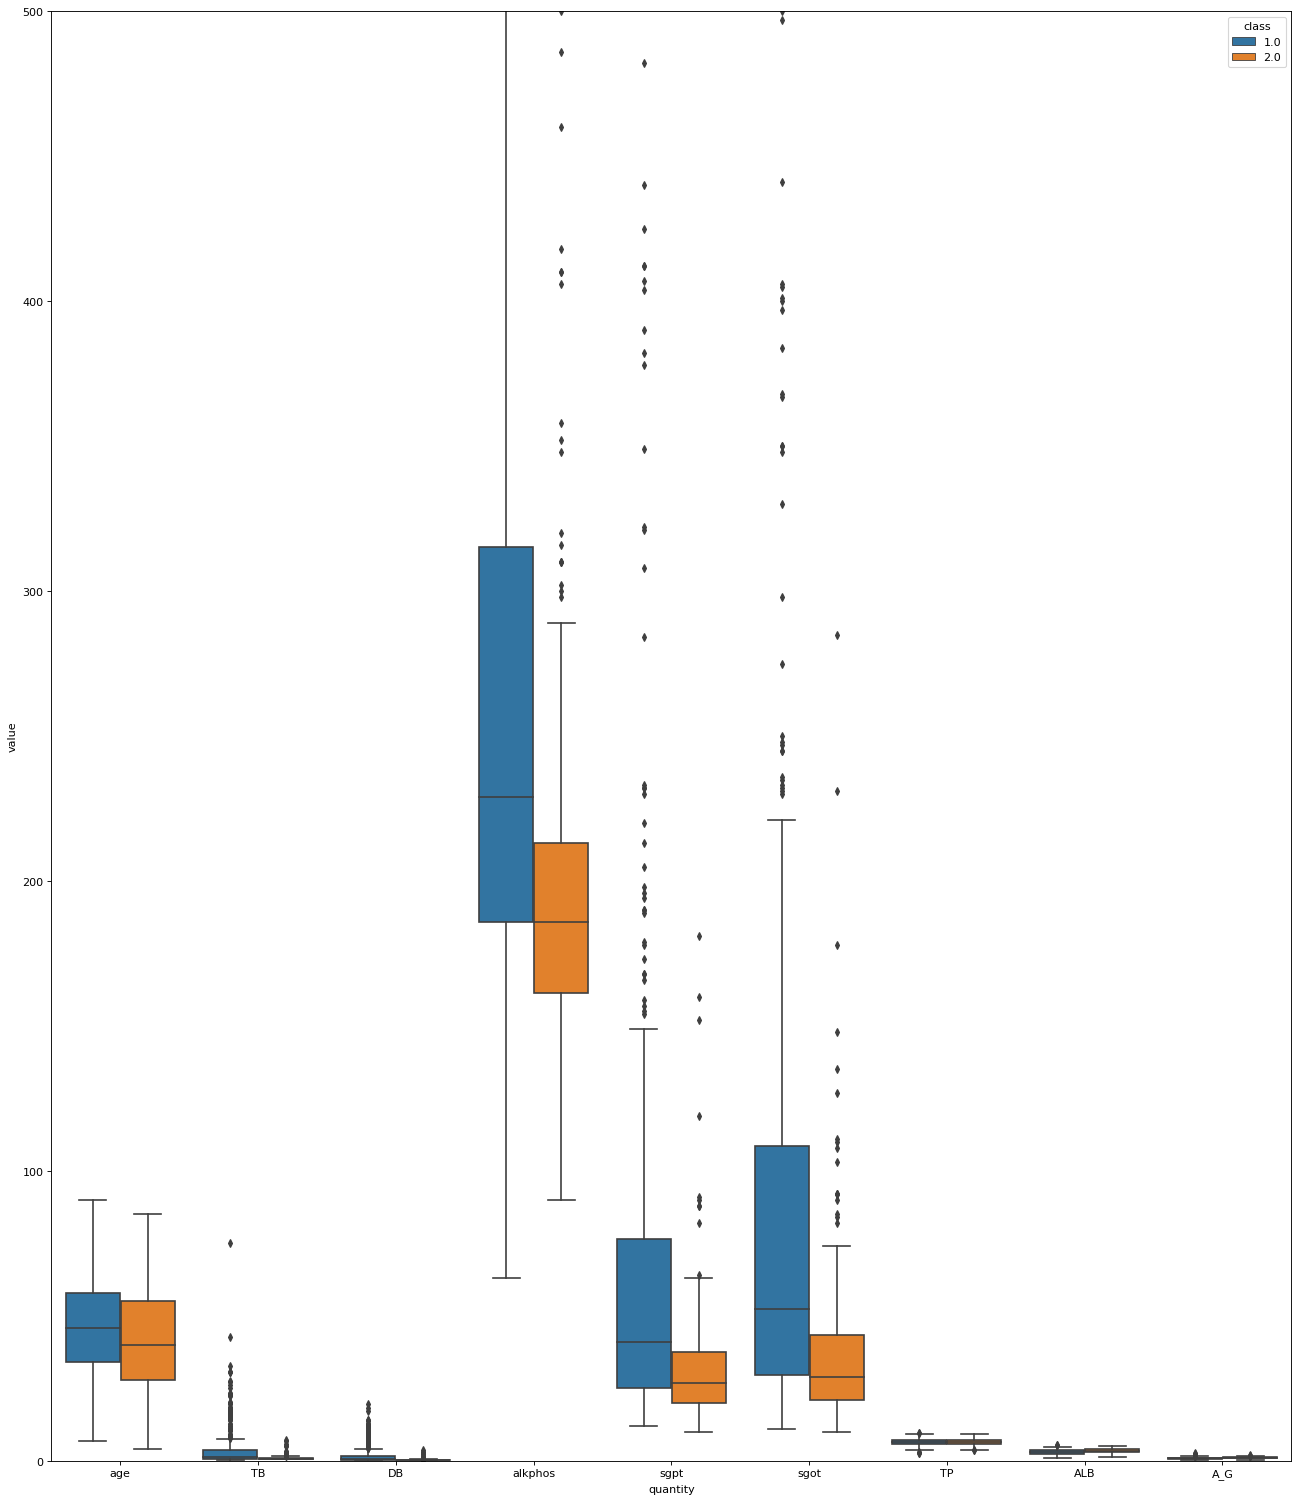

In [12]:
#The presence of outliers in patients with liver disease and without liver disease further complicates the diagnosis.

#liverDisease_df = liver_df[liver_df['class'] == 1]
#liverDisease_df.drop(['Gender', 'class'], axis=1).boxplot()
#nonLiverDisease_df = liver_df[liver_df['Dataset'] == 2]
#nonLiverDisease_df.drop(['Gender', 'Dataset'], axis=1).boxplot()
fig=plt.figure(figsize=(20, 24), dpi= 80, facecolor='w', edgecolor='k')

ax = liver_df.drop(['gender'], axis='columns').set_index('class', append=True).stack().to_frame().reset_index().rename(columns={'level_2':'quantity', 0:'value'}).pipe((sns.boxplot,'data'), x='quantity', y='value', hue='class')
ax.set(ylim=(0,500))


In [13]:
# Correlation
liver_corr = liver_df.corr()
liver_corr


,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000


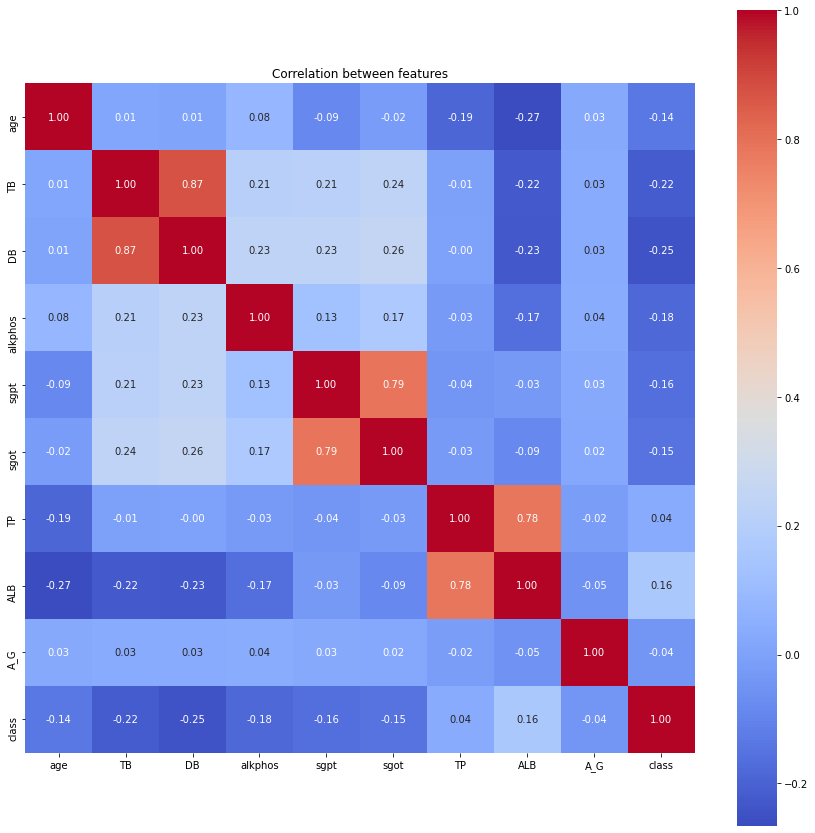

In [14]:

plt.figure(figsize=(15, 15))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           cmap= 'coolwarm')
plt.title('Correlation between features');


In [15]:
#Observation:
# The "Dataset" column which indicates the presence or absence of liver disease does not strongly correlate with one of the
# measured metrics. There are strong positive correlations between pairs of measured quantities 
# (Total_Proteins & Albumin, Total_Proteins & Albumin, Alamine_Aminotransferase & Aspartate_Aminotransferase, 
# Direct_Bilirubin & Total_Bilirubin. Without more insight into the actual meaning of these quantities, it is possible 
# these measurements are similar in nature and we might be able to reduce the dimensionality of this problem using Principle 
# Component Analysis (PCA).

In [16]:
# TRAIN, TEST SPLIT
from sklearn.model_selection import train_test_split

X = liver_df.drop(['gender', 'class'], axis='columns')
#Y = target
y = liver_df['class'] # 1 for liver disease; 2 for no liver disease

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [18]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
knn_pred = knn_model.predict(X_test)

In [20]:
#Predictions and Evaluations
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)

In [21]:
cm

array([[108,  19],
       [ 36,  12]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,knn_pred))

0.6857142857142857


In [ ]:
#Conclusion - We successfully implement for KNN for classification.